## Weather data from NCEI NOAA

**National Centers for Environmental Information (NCEI)**

**National Oceanic and Atmospheric Administration (NOAA)**

Documentation link: https://www.ncei.noaa.gov/data/daily-summaries/doc/GHCND_documentation.pdf

- AWND: Average daily wind speed (meters per second or miles per hour)
- PGTM: Peak gust time (hours and minutes, i.e., HHMM)
- PRCP: Precipitation (mm or inches as per user preference)
- TAVG: Average Temperature
- TMAX: Max Temperature (Fahrenheit)
- TMIN: Min Temperature (Fahrenheit)
- WDF2: Direction of the fastest 2-minute wind (degrees)
- WDF5: Direction of the fastest 5-minute wind (degrees)
- WSF2: Fastest 2-minute wind speed
- WSF5: Fastest 5-minute wind speed
- WT**: Weather Type where **:
    - 01 = fog, ice fog, or freezing fog
    - 02 = heavy fog or heavy freezing fog
    - 03 = thunder
    - 08 = smoke or haze

The data is taken from the Santa Monica Municipal Airport, CA US which is within a 10 mile radius from the Pacific Palisades.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [23]:
df = pd.read_csv('../data/4046203.csv')
df = df[df['STATION'] == "USW00093197"]
df['DATE'] = pd.to_datetime(df["DATE"])
df

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
120,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",2025-01-01,2.24,1252.0,0.0,NaN,60,44,230.0,230.0,12.1,16.1,NaN,NaN,NaN,NaN
121,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",2025-01-02,2.24,1222.0,0.0,NaN,66,44,200.0,210.0,10.1,13.0,NaN,NaN,NaN,NaN
122,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",2025-01-03,2.01,1249.0,0.0,NaN,60,47,220.0,240.0,10.1,16.1,NaN,NaN,NaN,NaN
123,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",2025-01-04,2.91,830.0,0.0,NaN,62,46,290.0,290.0,14.1,17.0,NaN,NaN,NaN,NaN
124,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",2025-01-05,3.80,1434.0,0.0,NaN,72,47,230.0,230.0,13.0,19.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",2025-04-26,5.37,NaN,0.2,NaN,62,50,210.0,200.0,16.1,25.9,1.0,NaN,NaN,NaN
236,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",2025-04-27,4.92,NaN,0.0,NaN,62,49,200.0,220.0,16.1,23.9,NaN,NaN,NaN,NaN
237,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",2025-04-28,4.47,NaN,0.0,NaN,64,50,220.0,240.0,13.0,18.1,NaN,NaN,NaN,NaN
238,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",2025-04-29,4.70,NaN,0.0,NaN,65,51,230.0,220.0,14.1,19.9,NaN,NaN,NaN,NaN


### Plotting Precitipation Data

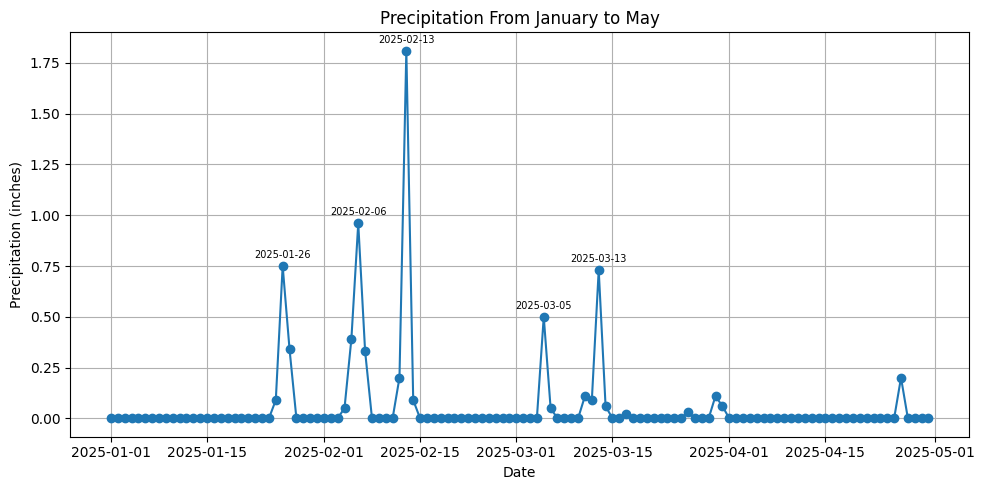

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['PRCP'], marker='o') 

# Annotate dates where precipitation is not zero
for i, row in df.iterrows():
    if row['PRCP'] >= 0.5:
        date_str = row['DATE'].strftime('%Y-%m-%d')
        plt.text(row['DATE'], row['PRCP'] + 0.03, date_str,
                 ha='center', va='bottom', fontsize=7)

plt.title('Precipitation From January to May')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Plotting Smoke/Haze Days

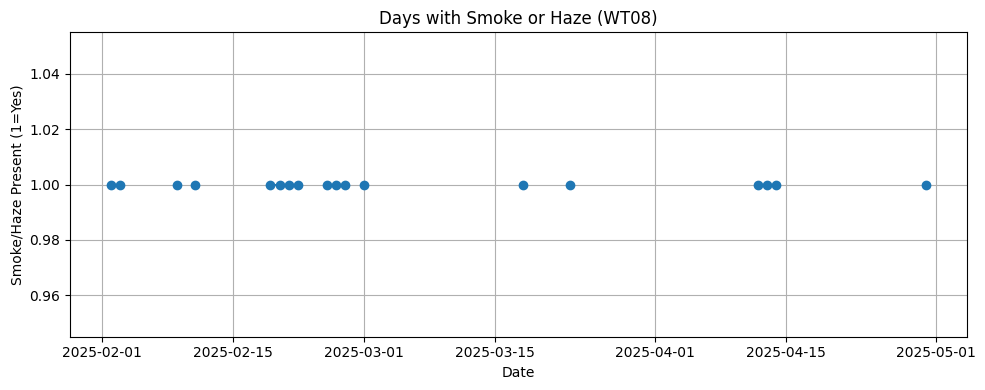

In [28]:
# Plotting smoke days
# WT08 = there was smoke or haze

smoke_days = df[df['WT08'] == 1]

plt.figure(figsize=(10, 4))
plt.plot(df['DATE'], df['WT08'], marker='o', linestyle='-', label="Smoke/Haze")
plt.title("Days with Smoke or Haze (WT08)")
plt.xlabel("Date")
plt.ylabel("Smoke/Haze Present (1=Yes)")
plt.grid(True)
plt.tight_layout()
plt.show()

It's interesting that there arent't any dates in January that are said to have smoke or haze. Haze may also be different than smoke. I would think that there would be smoke detected near the days of the fire.

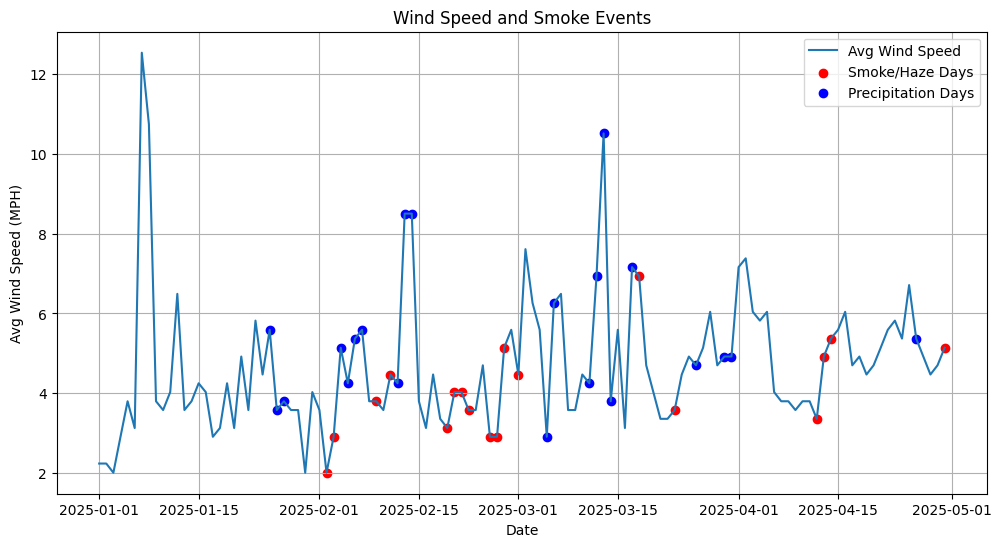

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['AWND'], label='Avg Wind Speed')
plt.scatter(smoke_days['DATE'], smoke_days['AWND'], color='red', label='Smoke/Haze Days')
prcp_days = df[df['PRCP'] > 0]
plt.scatter(prcp_days['DATE'], prcp_days['AWND'], color='blue', label='Precipitation Days', marker='o')
plt.title("Wind Speed and Smoke/Precipitation Events")
plt.ylabel("Avg Wind Speed (MPH)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

### Plotting Wind Speed and Direction

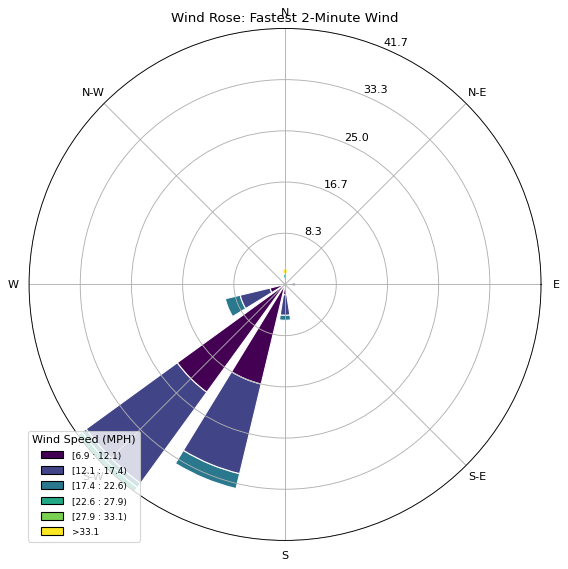

In [34]:
df = df.dropna(subset=['WDF2', 'WSF2'])

# Create the wind rose
ax = WindroseAxes.from_ax()
ax.bar(df['WDF2'], df['WSF2'], normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title="Wind Speed (MPH)")
plt.title("Wind Rose: Fastest 2-Minute Wind")
plt.show()

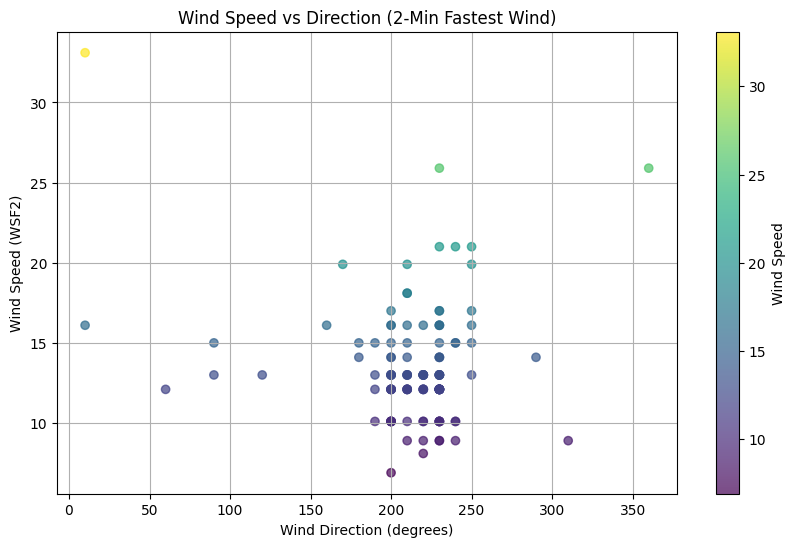

In [32]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['WDF2'], df['WSF2'], c=df['WSF2'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label="Wind Speed")
plt.xlabel("Wind Direction (degrees)")
plt.ylabel("Wind Speed (WSF2)")
plt.title("Wind Speed vs Direction (2-Min Fastest Wind)")
plt.grid(True)
plt.show()

C:\Users\katel\AppData\Local\Temp\ipykernel_23760\2406225789.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='spd_bin', columns='dir_bin', values='WSF2', aggfunc='count').fillna(0)


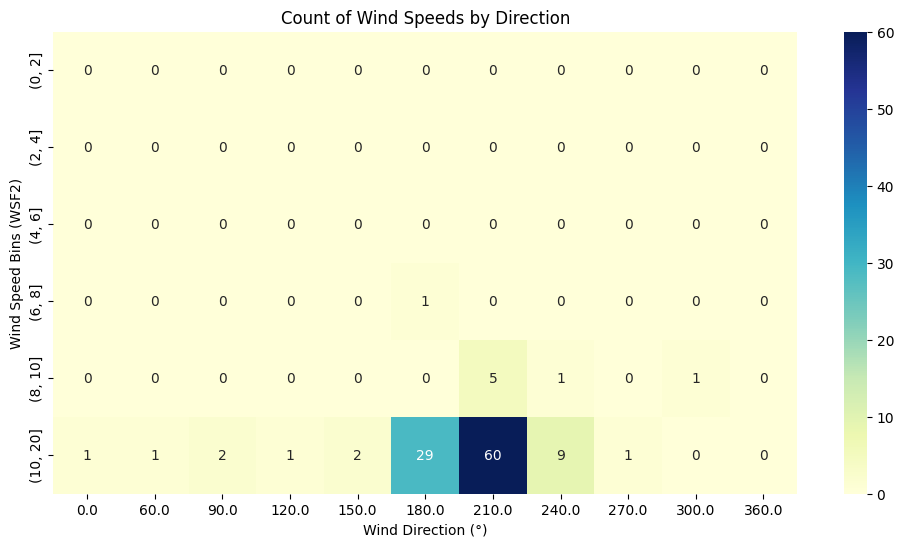

In [33]:
df['dir_bin'] = (df['WDF2'] // 30) * 30
df['spd_bin'] = pd.cut(df['WSF2'], bins=[0, 2, 4, 6, 8, 10, 20])

pivot = df.pivot_table(index='spd_bin', columns='dir_bin', values='WSF2', aggfunc='count').fillna(0)

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Count of Wind Speeds by Direction")
plt.xlabel("Wind Direction (°)")
plt.ylabel("Wind Speed Bins (WSF2)")
plt.show()

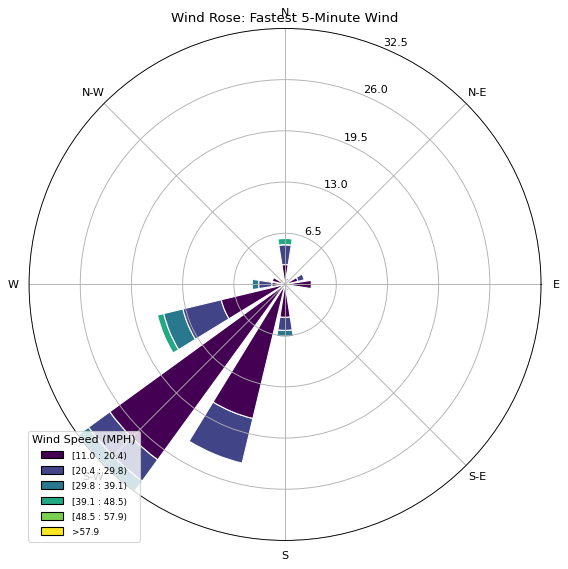

In [35]:
df = df.dropna(subset=['WDF5', 'WSF5'])

# Create the wind rose
ax = WindroseAxes.from_ax()
ax.bar(df['WDF5'], df['WSF5'], normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title="Wind Speed (MPH)")
plt.title("Wind Rose: Fastest 5-Minute Wind")
plt.show()

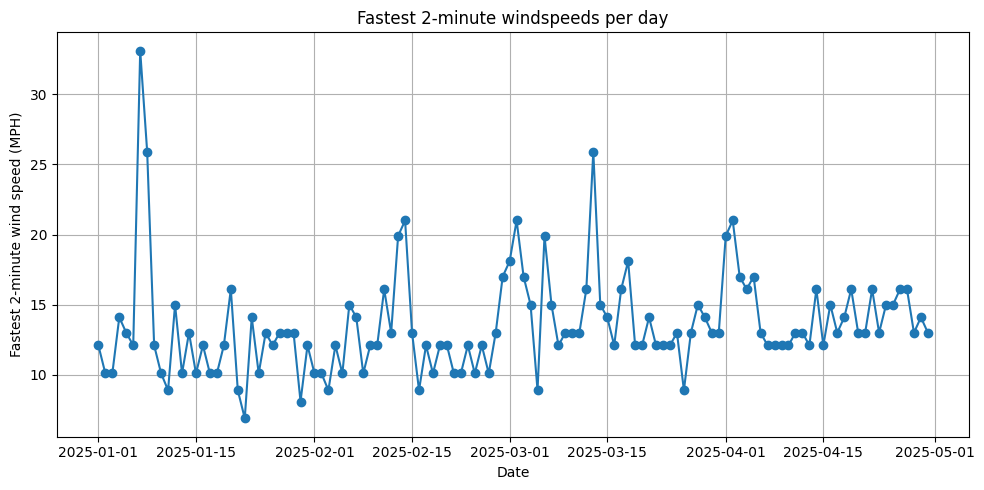

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['WSF2'], marker='o') 

plt.title('Fastest 2-minute windspeeds per day')
plt.xlabel('Date')
plt.ylabel('Fastest 2-minute wind speed (MPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

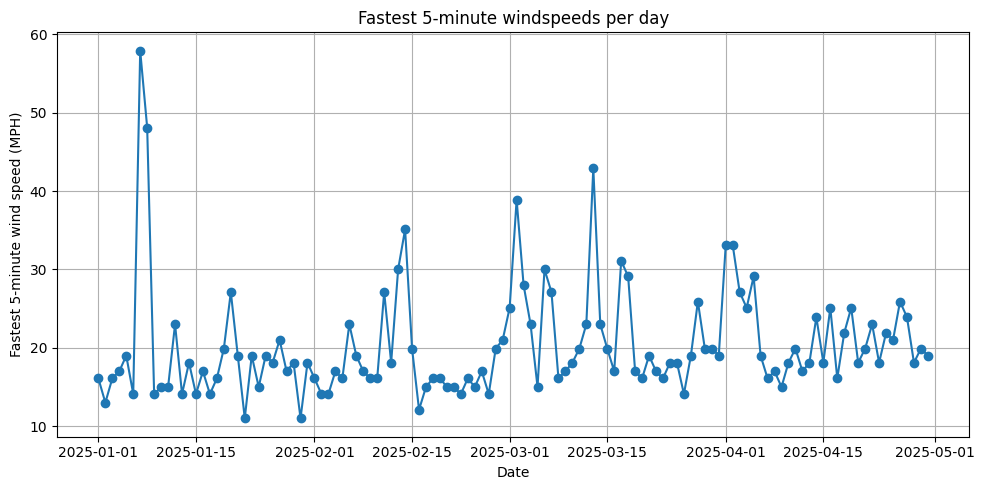

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['WSF5'], marker='o') 

plt.title('Fastest 5-minute windspeeds per day')
plt.xlabel('Date')
plt.ylabel('Fastest 5-minute wind speed (MPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

The 5-minute and 2-minute fastest windspeeds plots have the same shape, with the 5-minute speeds having higher values. This is expected.

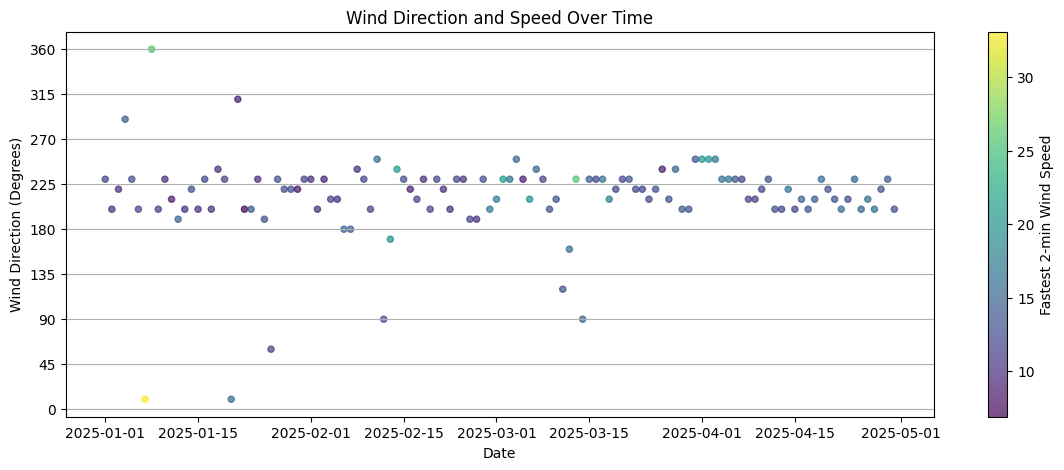

In [41]:
plt.figure(figsize=(14, 5))
sc = plt.scatter(df['DATE'], df['WDF2'], c=df['WSF2'], cmap='viridis', s=20, alpha=0.7)
plt.colorbar(sc, label='Fastest 2-min Wind Speed')
plt.ylabel("Wind Direction (Degrees)")
plt.xlabel("Date")
plt.title("Wind Direction and Speed Over Time")
plt.yticks(range(0, 361, 45))
plt.grid(True, axis='y')
plt.show()

It seems that most of the directions fall around 250 degrees, but the day when the fire started (January 7th) had unexpected winds that were stronger and in a different direction. 

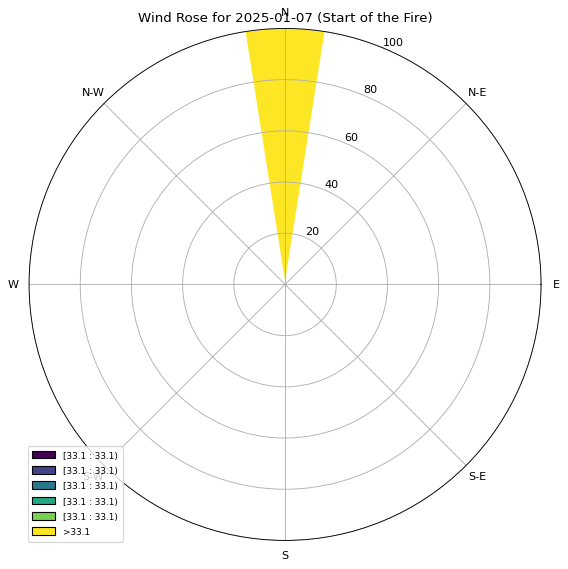

In [46]:
# Wind Direction Rode for specific day

day = '2025-01-07'
df_day = df[df['DATE'] == day]

ax = WindroseAxes.from_ax()
ax.bar(df_day['WDF2'], df_day['WSF2'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title(f"Wind Rose for {day} (Start of the Fire)")
plt.show()

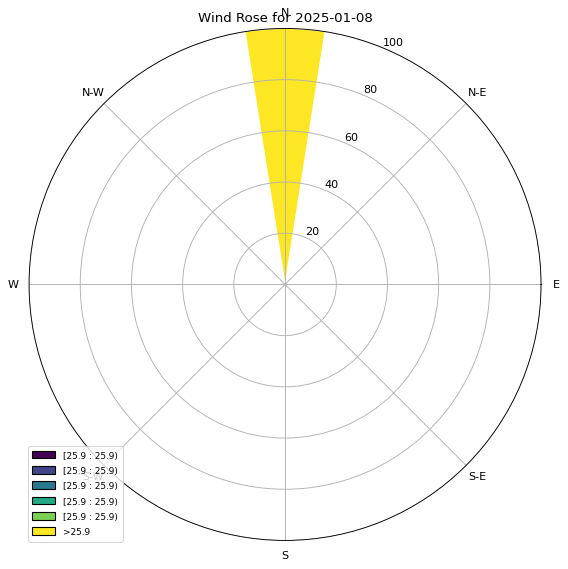

In [47]:
# Wind Direction Rode for specific day

day = '2025-01-08'
df_day = df[df['DATE'] == day]

ax = WindroseAxes.from_ax()
ax.bar(df_day['WDF2'], df_day['WSF2'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title(f"Wind Rose for {day}")
plt.show()

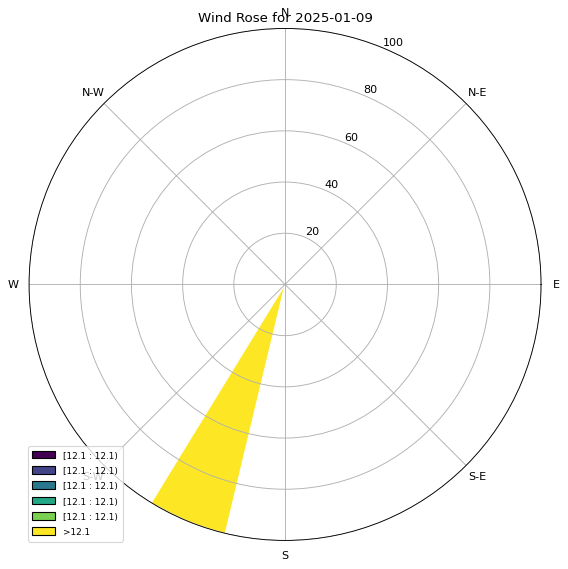

In [48]:
# Wind Direction Rode for specific day

day = '2025-01-09'
df_day = df[df['DATE'] == day]

ax = WindroseAxes.from_ax()
ax.bar(df_day['WDF2'], df_day['WSF2'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title(f"Wind Rose for {day}")
plt.show()

<Figure size 600x600 with 0 Axes>

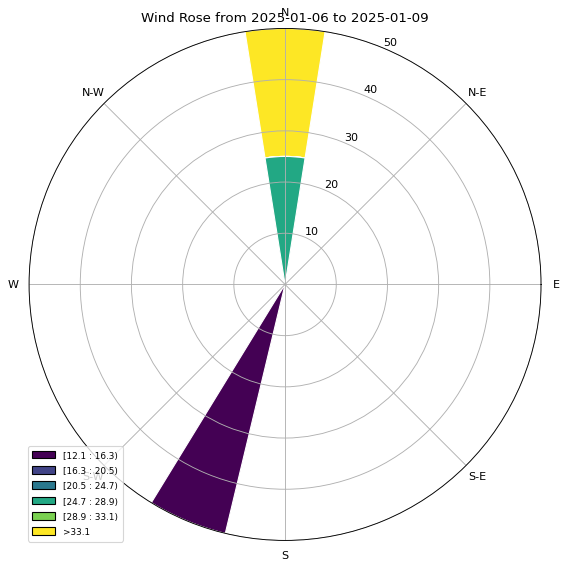

In [53]:
# Wind Direction Rose for Range of Days

start_date = '2025-01-06'
end_date = '2025-01-09'

# Filter your DataFrame for dates in the range
mask = (df['DATE'] >= start_date) & (df['DATE'] <= end_date)
df_range = df.loc[mask]

# Plot the wind rose for the range
fig = plt.figure(figsize=(6, 6))
ax = WindroseAxes.from_ax()
ax.bar(df_range['WDF2'], df_range['WSF2'], normed=True, opening=0.8, edgecolor='white')
ax.set_title(f"Wind Rose from {start_date} to {end_date}")
ax.set_legend()
plt.show()

On January 7th and 8th, there were very high windspeeds in the North direction. The days before and after (Jan 6 and Jan 9) had lower windspeeds in the South / Southwest direction. It seems that the average winds are in the S / SW direction and on January 7th there were out of the oridinary winds both in terms of strength and direction.